In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


stock_market = pd.read_csv("D:/Self shimts/real shit/Raghul - stock market/raghul-dataset-project.csv")
stock_market

,Date,Open,High,Low,Close,Adj Close,Volume (in Exp),day,month,year,Volume
0,19-08-2004,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,19,8,2004,893181924
1,20-08-2004,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,20,8,2004,456686856
2,23-08-2004,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,23,8,2004,365122512
3,24-08-2004,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,24,8,2004,304946748
4,25-08-2004,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,25,8,2004,183772044
...,...,...,...,...,...,...,...,...,...,...,...
5113,11-12-2024,185.309998,195.610001,184.850006,195.399994,195.399994,67894100,11,12,2024,67894100
5114,12-12-2024,195.000000,195.179993,191.710007,191.960007,191.960007,34817500,12,12,2024,34817500
5115,13-12-2024,191.009995,192.729996,189.639999,189.820007,189.820007,25143500,13,12,2024,25143500
5116,16-12-2024,192.869995,199.000000,192.619995,196.660004,196.660004,44934900,16,12,2024,44934900


In [2]:
stock_market.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume (in Exp)    0
day                0
month              0
year               0
Volume             0
dtype: int64

In [4]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5118 non-null   object 
 1   Open             5118 non-null   float64
 2   High             5118 non-null   float64
 3   Low              5118 non-null   float64
 4   Close            5118 non-null   float64
 5   Adj Close        5118 non-null   float64
 6   Volume (in Exp)  5118 non-null   int64  
 7   day              5118 non-null   int64  
 8   month            5118 non-null   int64  
 9   year             5118 non-null   int64  
 10  Volume           5118 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 440.0+ KB


In [5]:
stock_market.describe()

,Open,High,Low,Close,Adj Close,Volume (in Exp),day,month,year,Volume
count,5118.000000,5118.000000,5118.000000,5118.000000,5118.000000,5.118000e+03,5118.000000,5118.000000,5118.000000,5.118000e+03
mean,47.639701,48.139771,47.149358,47.654613,47.490963,1.157640e+08,15.729386,6.604338,2014.288394,1.157640e+08
std,45.736050,46.241037,45.269941,45.763431,45.621100,1.470189e+08,8.755223,3.430820,5.874965,1.470189e+08
min,2.482232,2.546046,2.401401,2.502753,2.493713,9.312000e+06,1.000000,1.000000,2004.000000,9.312000e+06
25%,13.176239,13.307683,13.039790,13.182808,13.135192,3.064900e+07,8.000000,4.000000,2009.000000,3.064900e+07
50%,28.003501,28.195346,27.751500,27.969750,27.868724,5.752321e+07,16.000000,7.000000,2014.000000,5.752321e+07
75%,62.746125,63.414874,62.220124,62.900626,62.673431,1.393135e+08,23.000000,10.000000,2019.000000,1.393135e+08
max,197.250000,201.419998,194.979996,196.660004,196.660004,1.643023e+09,31.000000,12.000000,2024.000000,1.643023e+09


In [6]:
stock_market.shape

(5118, 11)

In [7]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], format='%d-%m-%Y')
stock_market

,Date,Open,High,Low,Close,Adj Close,Volume (in Exp),day,month,year,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,19,8,2004,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,20,8,2004,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,23,8,2004,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,24,8,2004,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,25,8,2004,183772044
...,...,...,...,...,...,...,...,...,...,...,...
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,195.399994,67894100,11,12,2024,67894100
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,191.960007,34817500,12,12,2024,34817500
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,189.820007,25143500,13,12,2024,25143500
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,196.660004,44934900,16,12,2024,44934900


In [8]:

stock_market = stock_market.drop(columns=['Adj Close', 'Volume (in Exp)', 'Volume'])
stock_market

,Date,Open,High,Low,Close,day,month,year
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,19,8,2004
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,20,8,2004
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,23,8,2004
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,24,8,2004
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,25,8,2004
...,...,...,...,...,...,...,...,...
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,11,12,2024
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,12,12,2024
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,13,12,2024
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,16,12,2024


In [9]:
X = stock_market.drop(columns=['Close'])
Y = stock_market['Close']
X = pd.get_dummies(X, drop_first=True)

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_17280\91523673.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


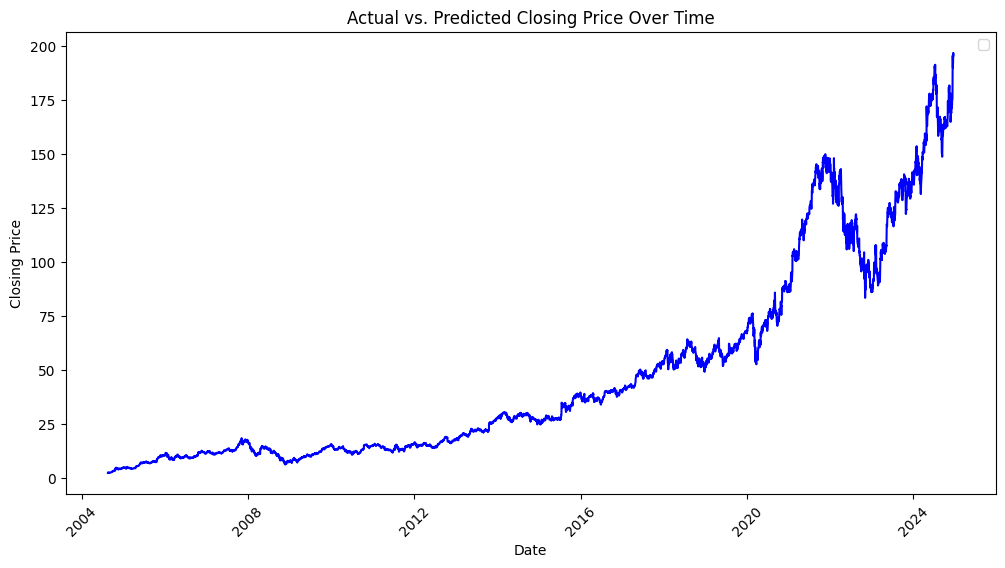

In [10]:
# 1. Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Close'], color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Price Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show();


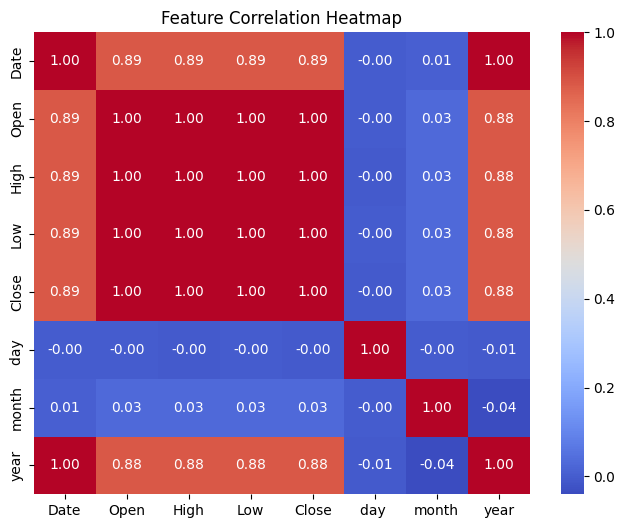

In [11]:

#2. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(stock_market.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show();

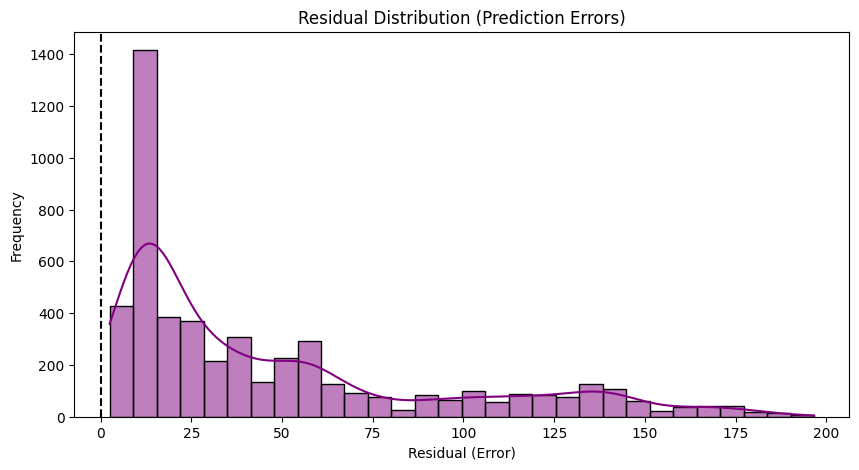

In [12]:
# 3. Residual Plot (Prediction Errors)
stock_market['Residuals'] = stock_market['Close'] 
plt.figure(figsize=(10, 5))
sns.histplot(stock_market['Residuals'], bins=30, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Prediction Errors)")
plt.show();

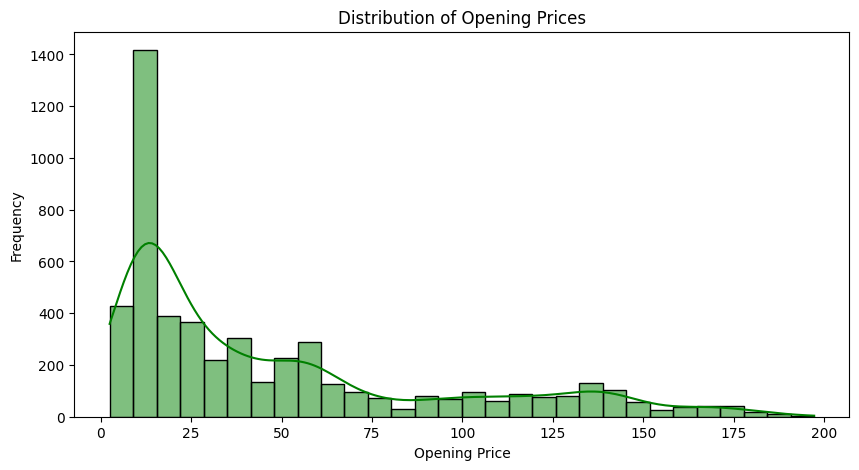

In [13]:
# 4. Distribution Plot of Closing Price
plt.figure(figsize=(10, 5))
sns.histplot(stock_market['Open'], bins=30, kde=True, color='green')
plt.xlabel("Opening Price")
plt.ylabel("Frequency")
plt.title("Distribution of Opening Prices")
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['number']).columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['number']).columns)

In [79]:
model = RandomForestRegressor(n_estimators=1, random_state=2)
model.fit(X_train_scaled, Y_train)

RandomForestRegressor(n_estimators=1, random_state=2)

In [80]:
Y_pred = model.predict(X_test_scaled)
pd.DataFrame({"Predicted":Y_pred, "Actual": Y_test}) 

,Predicted,Actual
530,10.068068,10.181932
5004,182.990005,188.979996
4988,176.619995,175.160004
1340,14.702452,14.908158
4068,78.171997,77.773499
...,...,...
947,13.488488,13.629129
4010,75.522499,75.410500
762,12.712713,12.834835
715,13.157658,13.137638


In [81]:
r2 = r2_score(Y_test, Y_pred)
print("Model Accuracy",r2*100,"%")

Model Accuracy 99.95736713715856 %


In [82]:
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.45881289211554577


In [83]:
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Standard Error:",mse)

Mean Standard Error: 0.9098341201170056


In [84]:
rmse = np.sqrt(mse)
print("Root MSE:",rmse)

Root MSE: 0.9538522527713638
